In [1]:
import pandas

In [5]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

from dataset import get_dataset


dfx, dfy = get_dataset('titanic')

# g = sns.PairGrid(dfx)
# g.map(sns.scatterplot)



In [6]:
print ([e for e in dfx])

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


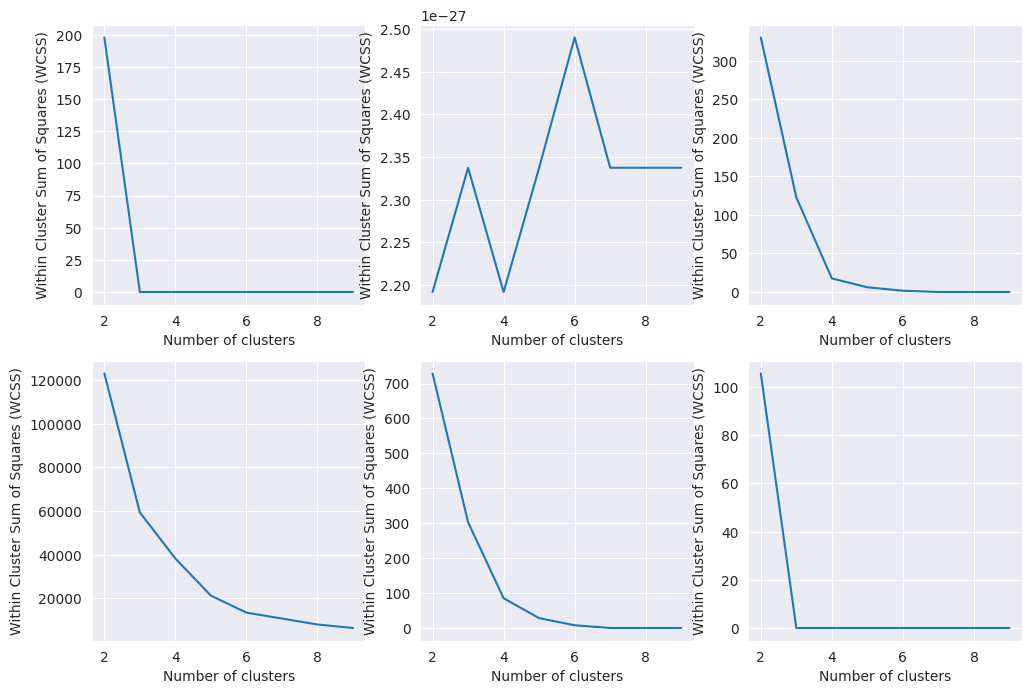

In [7]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(12)
axess = [[0,0], [0,1],[1,0],[1,1],[0,2],[1,2]]
for idx, e in enumerate(dfx):
    X = np.array(dfx.loc[:,[e,                # Choose your variable names
                           e]])    \
                            .reshape(-1, 2)

    # Determine optimal cluster number with elbow method
    wcss = []

    for i in range(2, 10):
        model = KMeans(n_clusters = i,     
                        init = 'k-means++',                 # Initialization method for kmeans
                        max_iter = 300,                     # Maximum number of iterations 
                        n_init = 10,                        # Choose how often algorithm will run with different centroid 
                        random_state = 0)                   # Choose random state for reproducibility
        model.fit(X)                              
        wcss.append(model.inertia_)

    # Show Elbow plot
    axs[axess[idx][0], axess[idx][1]].plot(range(2, 10), wcss)
    #axs[axess[idx][0], axess[idx][1]].set_title('Elbow Method')                               # Set plot title
    axs[axess[idx][0], axess[idx][1]].set_xlabel('Number of clusters')                        # Set x axis name
    axs[axess[idx][0], axess[idx][1]].set_ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name

0.562429696287964


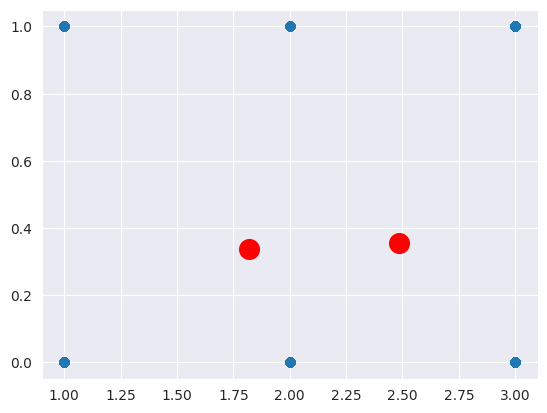

In [16]:
X, y = np.array(dfx), np.array(dfy)
kmeans = KMeans(n_clusters = 2,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)
from sklearn.metrics import accuracy_score
print (accuracy_score(y, pred_y))
# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

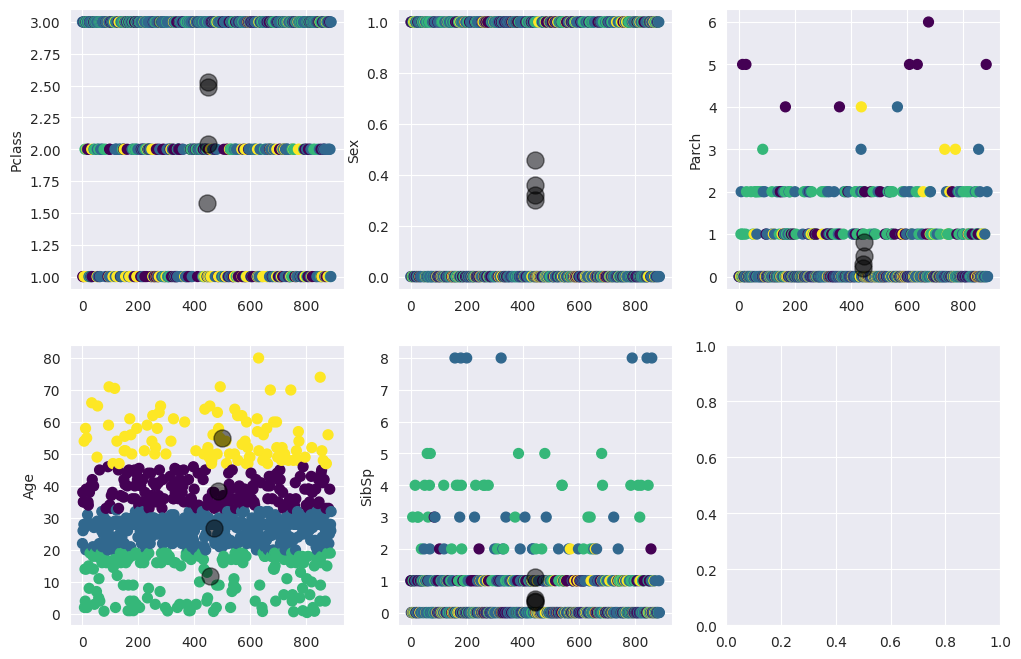

In [33]:
X, y = get_dataset('titanic')
X = np.array(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
fig, axs = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(12)
axess = [[0,0], [0,1],[1,0],[1,1],[0,2]]
for idx in range(X.shape[1]-1):
    centers = kmeans.cluster_centers_
    #axs[axess[idx][0], axess[idx][1]].scatter(X[:, idx], X[:, idx+1], c=y_kmeans, s=50, cmap='viridis')
    #axs[axess[idx][0], axess[idx][1]].scatter(centers[:, idx], centers[:, idx+1], c='black', s=150, alpha=0.5)
    axs[axess[idx][0], axess[idx][1]].scatter(range(X.shape[0]), X[:, idx], c=y_kmeans, s=50, cmap='viridis')
    axs[axess[idx][0], axess[idx][1]].scatter(centers[:, idx]+X.shape[0]/2, centers[:, idx], c='black', s=150, alpha=0.5)
    axs[axess[idx][0], axess[idx][1]].set_ylabel(dfx.keys()[idx])

In [30]:
dfx.keys()[0]

'Pclass'